In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv("combined.csv")

In [3]:
dataset.head()

,Date,Sentiment,Daily Change,Direction,Signal
0,01/07/2015,0.000000,0.000000,DOWN,-1
1,02/07/2015,0.150000,10.869995,UP,1
2,03/07/2015,0.119048,-0.149994,DOWN,-1
3,04/07/2015,0.191667,-0.074997,DOWN,-1
4,05/07/2015,0.311111,-0.037499,DOWN,-1


In [4]:
sentiment = dataset["Sentiment"]

In [5]:
change = dataset["Daily Change"]

In [6]:
signal = dataset["Signal"]

First, let's generate a scatterplot so we have a visual representation of the data for sentiment score & daily change in stock price.

<function matplotlib.pyplot.show(*args, **kw)>

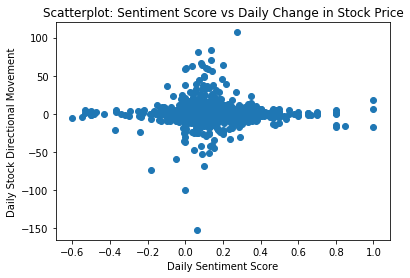

In [7]:
plt.scatter(sentiment, change)
plt.title("Scatterplot: Sentiment Score vs Daily Change in Stock Price")
plt.xlabel('Daily Sentiment Score')
plt.ylabel('Daily Stock Directional Movement')
plt.show

Now we wish to look at the Co-Variance Matrix

In [8]:
covariance = np.cov(sentiment, change)
print(covariance)

[[2.50642304e-02 1.00606329e-02]
 [1.00606329e-02 1.28175658e+02]]


In [9]:
covariance = np.cov(sentiment, signal)
print(covariance)

[[ 0.02506423 -0.00135184]
 [-0.00135184  0.99948704]]


The covariance matrix is difficult to interpret.
<br>
Let's take a look at Pearson's Correlation Co-Efficient in the hope that this will provide greater insight.

In [10]:
from scipy.stats import pearsonr

In [11]:
corr, _ = pearsonr(sentiment, change)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.006


So we do have a (very minimal) positive correlation between the two variables,
<br>
according to calculating Pearson's correlation co-efficient.

In [12]:
corr, _ = pearsonr(sentiment, signal)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.009


So we do have a (very minimal) negative correlation between the two variables,
<br>
according to calculating Pearson's correlation co-efficient.

Another test exists which is often employed in the case of a non-linear relationship, 
<br>
which could prove to be more effective in this case.
<br>
Let's employ the calculation to find Spearman's Correlation Co-Efficient.

In [13]:
from scipy.stats import spearmanr

In [14]:
corr, _ = spearmanr(sentiment, change)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.001


In [15]:
corr, _ = spearmanr(sentiment, signal)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.000


So it appears that the two time series are not correlated,
<br>
at least in any significant manner.

There is another method which can be employed, which should help to determine if any relationship exists.
<br>
This is known as Granger Causality.
<br>
This is a statistical method which is used to test if one set of time series data,
<br>
would be useful in forecasting another.

In [16]:
correlation = pd.read_csv("correlation.csv")
correlation = correlation.set_index('Date')
correlation.head()

,Daily Change,Sentiment
Date,,
01/07/2015,0.000000,0.000000
02/07/2015,10.869995,0.150000
03/07/2015,-0.149994,0.119048
04/07/2015,-0.074997,0.191667
05/07/2015,-0.037499,0.311111


In [17]:
from statsmodels.tsa.stattools import grangercausalitytests

In [19]:
grangercausalitytests(correlation[['Daily Change', 'Sentiment']], maxlag=10)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5488  , p=0.4589  , df_denom=1803, df_num=1
ssr based chi2 test:   chi2=0.5497  , p=0.4585  , df=1
likelihood ratio test: chi2=0.5496  , p=0.4585  , df=1
parameter F test:         F=0.5488  , p=0.4589  , df_denom=1803, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5179  , p=0.5958  , df_denom=1800, df_num=2
ssr based chi2 test:   chi2=1.0388  , p=0.5949  , df=2
likelihood ratio test: chi2=1.0385  , p=0.5950  , df=2
parameter F test:         F=0.5179  , p=0.5958  , df_denom=1800, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6188  , p=0.6028  , df_denom=1797, df_num=3
ssr based chi2 test:   chi2=1.8636  , p=0.6012  , df=3
likelihood ratio test: chi2=1.8627  , p=0.6014  , df=3
parameter F test:         F=0.6188  , p=0.6028  , df_denom=1797, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7849  , p=0.

{1: ({'ssr_ftest': (0.5487523257226234, 0.45892440161833814, 1803.0, 1),
   'ssr_chi2test': (0.549665391156438, 0.45845444735106144, 1),
   'lrtest': (0.5495817613809777, 0.4584886365619475, 1),
   'params_ftest': (0.5487523257225921, 0.4589244016184205, 1803.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.5179408377799831, 0.5958347829901882, 1800.0, 2),
   'ssr_chi2test': (1.038759124658744, 0.5948895253660191, 2),
   'lrtest': (1.0384603416350728, 0.5949784034502393, 2),
   'params_ftest': (0.5179408377799886, 0.5958347829901882, 1800.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.6188043875861455, 0.6028314034100277, 1797.0, 3),
   'ssr_chi2test': (1.863644599675136, 0.6011840399366337, 3),
   'lrtest': (1.8626826315357903, 0.6013903951338282, 3),
   'params_ftest': (0.6188043875861947, 0.6028314034099848, 1797.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0.,

For the Granger Causality test, we consider if past values of Y can be used to predict X,
<br>
better than previous values of X alone.
<br>
As the p-value of each of the tests was greater than the testing level,
<br>
which was set at 0.05 as per statistical tradition,
<br>
we do not reject the null hypothesis.
<br>
This means that we must conclude that there is no causal effect of the lag in the sentiment.